# 02. PyTorch Classification Exercise Solutions

The following is one possible set (there may be more than one way to do things) of solutions for the 02. PyTorch WorkFlow Exercise template.

You can see a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/ByyHwoEgF0Q).

See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [1]:
# Check for GPU
!nvidia-smi

Fri Dec 23 06:51:44 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   72C    P0    32W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
# Import torch
import torch

# Setup device agnostic code
device ='cuda' if torch.cuda.is_available else 'cpu'

## 1. Make a binary classification dataset with Scikit-Learn's [`make_moons()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) function.
  * For consistency, the dataset should have 1000 samples and a `random_state=42`.
  * Turn the data into PyTorch tensors. 
  * Split the data into training and test sets using `train_test_split` with 80% training and 20% testing.

In [3]:
from sklearn.datasets import make_moons
n_samples = 1000

X,y = make_moons(n_samples, noise = 0.07,
                 random_state = 42)

X[:5], y[:5]

(array([[-0.03341062,  0.4213911 ],
        [ 0.99882703, -0.4428903 ],
        [ 0.88959204, -0.32784256],
        [ 0.34195829, -0.41768975],
        [-0.83853099,  0.53237483]]), array([1, 1, 1, 1, 0]))

In [4]:
# Turn data into a DataFrame
import pandas as pd

df = pd.DataFrame({'X1': X[:,0], 'X2': X[:,1], 'y': y})[:5]
df

,X1,X2,y
0,-0.033411,0.421391,1
1,0.998827,-0.442890,1
2,0.889592,-0.327843,1
3,0.341958,-0.417690,1
4,-0.838531,0.532375,0


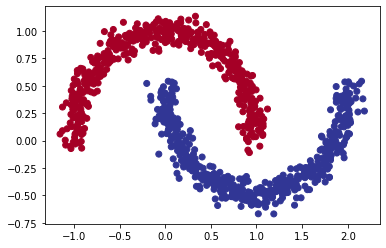

In [5]:
# Visualize the data on a plot
import matplotlib.pyplot as plt
# plt.figure(figsize=(6,6))
plt.scatter(X[:,0],X[:,1],c=y, cmap = plt.cm.RdYlBu)

In [6]:
# Turn data into tensors
X  = torch.from_numpy(X)
y = torch.from_numpy(y)

X = X.type(torch.float)
y = y.type(torch.float)
X.dtype, y.dtype

# perform train_test_split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 42)

## 2. Build a model by subclassing `nn.Module` that incorporates non-linear activation functions and is capable of fitting the data you created in 1.
  * Feel free to use any combination of PyTorch layers (linear and non-linear) you want.

In [7]:
import torch
from torch import nn

class MoonModelV0(nn.Module):
  def __init__(self):
    super().__init__()

    self.layer1 = nn.Linear(in_features= 2, out_features=10)
    self.layer2 = nn.Linear(in_features= 10, out_features=10)
    self.layer3 = nn.Linear(in_features= 10, out_features=1)
    self.relu = nn.ReLU()

  def forward(self, x):
    return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))

model_0 = MoonModelV0()
model_0

MoonModelV0(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [8]:
model_0.state_dict()

OrderedDict([('layer1.weight', tensor([[-0.1761, -0.4883],
                      [-0.1650, -0.1909],
                      [-0.6577, -0.0510],
                      [ 0.3295,  0.5209],
                      [-0.2851, -0.5761],
                      [ 0.6628,  0.1304],
                      [-0.3426, -0.5770],
                      [ 0.2616,  0.2768],
                      [ 0.5639,  0.1162],
                      [ 0.6037,  0.1905]])),
             ('layer1.bias',
              tensor([-0.2485,  0.2117,  0.2769,  0.4525,  0.5044,  0.5107, -0.3585,  0.2693,
                      -0.4493,  0.2721])),
             ('layer2.weight',
              tensor([[ 0.0957,  0.0415, -0.2226,  0.1782, -0.1450,  0.1881,  0.2034, -0.2427,
                       -0.1211, -0.0912],
                      [ 0.2408,  0.1234, -0.2910,  0.1454,  0.0692,  0.0750,  0.1558,  0.2908,
                        0.3152, -0.2236],
                      [ 0.1993,  0.1408, -0.0754, -0.2337, -0.2883,  0.0525, -0.3145, -0.

## 3. Setup a binary classification compatible loss function and optimizer to use when training the model built in 2.

In [9]:
# from torch.nn.modules.loss import BCEWithLogitsLoss

loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params = model_0.parameters(), 
                            lr=0.01)


## 4. Create a training and testing loop to fit the model you created in 2 to the data you created in 1.
  * To measure model accuray, you can create your own accuracy function or use the accuracy function in [TorchMetrics](https://torchmetrics.readthedocs.io/en/latest/).
  * Train the model for long enough for it to reach over 96% accuracy.
  * The training loop should output progress every 10 epochs of the model's training and test set loss and accuracy.

In [10]:
# What's coming out of our model?

# X_train , X_test = torch.from_numpy(X_train), torch.from_numpy(X_test)
# y_train, y_test = torch.from_numpy(y_train), torch.from_numpy(y_test)
model_0.eval()
with torch.inference_mode():
  preds_label = torch.round(torch.sigmoid(model_0(X_train).squeeze()))
# preds_label

Modified Accuracy torchmetrics

In [11]:
!pip -q install torchmetrics # colab doesn't come with torchmetrics
from torchmetrics import Accuracy
acc_fn = Accuracy(task="binary", num_classes = 2)
acc_fn

     |████████████████████████████████| 512 kB 15.4 MB/s 


BinaryAccuracy()

In [12]:
torch.manual_seed(43)
torch.cuda.manual_seed(43)
epochs = 8001

#training
for epoch in range(epochs):
  model_0.train()

  train_logits = model_0(X_train).squeeze()
  preds_train = torch.round(torch.sigmoid(train_logits))

  # Train accuracy and loss
  loss = loss_fn(train_logits, y_train)
  acc = acc_fn(y_train, preds_train.int())

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


  #testing

  model_0.eval()
  with torch.inference_mode():
    test_logits = model_0(X_test).squeeze()
    preds_test = torch.round(torch.sigmoid(test_logits))

  # Test accuracy and loss
  test_loss = loss_fn(test_logits, y_test)
  test_acc = acc_fn(y_test, preds_test.int())
  
  if epoch % 500 == 0:
    print(f"Epoch: {epoch} | Train Loss: {loss:.3f} | Train Acc : {acc:.3f} | Test Loss: {test_loss:.3f} | Test acc: {test_acc:.3f}")

Epoch: 0 | Train Loss: 0.720 | Train Acc : 0.500 | Test Loss: 0.717 | Test acc: 0.500
Epoch: 500 | Train Loss: 0.654 | Train Acc : 0.831 | Test Loss: 0.657 | Test acc: 0.800
Epoch: 1000 | Train Loss: 0.453 | Train Acc : 0.820 | Test Loss: 0.473 | Test acc: 0.800
Epoch: 1500 | Train Loss: 0.290 | Train Acc : 0.861 | Test Loss: 0.302 | Test acc: 0.855
Epoch: 2000 | Train Loss: 0.240 | Train Acc : 0.886 | Test Loss: 0.242 | Test acc: 0.895
Epoch: 2500 | Train Loss: 0.218 | Train Acc : 0.900 | Test Loss: 0.216 | Test acc: 0.905
Epoch: 3000 | Train Loss: 0.202 | Train Acc : 0.913 | Test Loss: 0.199 | Test acc: 0.905
Epoch: 3500 | Train Loss: 0.187 | Train Acc : 0.916 | Test Loss: 0.184 | Test acc: 0.910
Epoch: 4000 | Train Loss: 0.171 | Train Acc : 0.928 | Test Loss: 0.168 | Test acc: 0.915
Epoch: 4500 | Train Loss: 0.152 | Train Acc : 0.934 | Test Loss: 0.147 | Test acc: 0.935
Epoch: 5000 | Train Loss: 0.124 | Train Acc : 0.942 | Test Loss: 0.117 | Test acc: 0.960
Epoch: 5500 | Train Loss:

## 5. Make predictions with your trained model and plot them using the `plot_decision_boundary()` function created in this notebook.

In [13]:
test_logits = torch.round(torch.sigmoid(model_0(X_test)))
test_logits[0:5]


tensor([[1.],
        [0.],
        [1.],
        [0.],
        [1.]], grad_fn=<SliceBackward0>)

In [14]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary


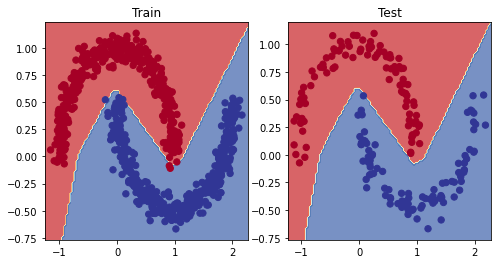

In [15]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

## 6. Replicate the Tanh (hyperbolic tangent) activation function in pure PyTorch.
  * Feel free to reference the [ML cheatsheet website](https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html#tanh) for the formula.

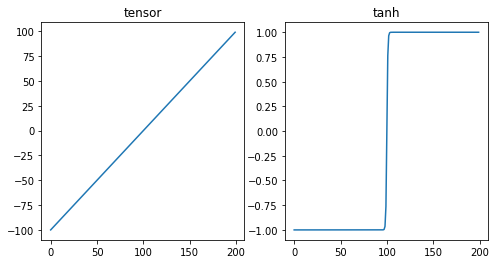

In [16]:
tensor_0 = torch.arange(start= -100, end = 100, step = 1)
tensor_0[:5]
plt.figure(figsize=(8,4))
plt.subplot(121)
plt.title("tensor")
plt.plot(tensor_0)
plt.subplot(122)
plt.title("tanh")
plt.plot(torch.tanh(tensor_0))

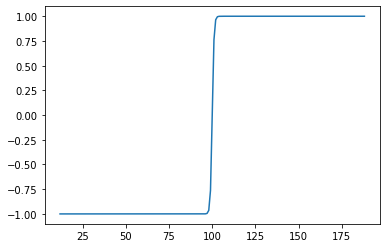

In [17]:
from math import exp

def tanh_exp(z):
  tanh = (torch.exp(z) - torch.exp(-z))/(torch.exp(z) + torch.exp(-z))
  return tanh

# tanh_exp(tensor_0)
plt.plot(tanh_exp(tensor_0))

## 7. Create a multi-class dataset using the [spirals data creation function from CS231n](https://cs231n.github.io/neural-networks-case-study/) (see below for the code).
  * Split the data into training and test sets (80% train, 20% test) as well as turn it into PyTorch tensors.
  * Construct a model capable of fitting the data (you may need a combination of linear and non-linear layers).
  * Build a loss function and optimizer capable of handling multi-class data (optional extension: use the Adam optimizer instead of SGD, you may have to experiment with different values of the learning rate to get it working).
  * Make a training and testing loop for the multi-class data and train a model on it to reach over 95% testing accuracy (you can use any accuracy measuring function here that you like).
  * Plot the decision boundaries on the spirals dataset from your model predictions, the `plot_decision_boundary()` function should work for this dataset too.

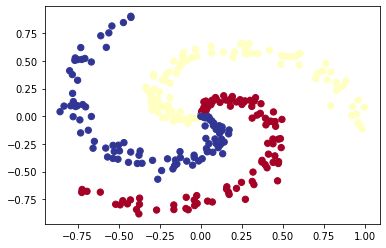

In [18]:
# Code for creating a spiral dataset from CS231n
import numpy as np
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
plt.show()

In [19]:
# Turn data into tensors
X = torch.from_numpy(X).type(torch.float) # features as float32
y = torch.from_numpy(y).type(torch.LongTensor) # labels need to be of type long

# Create train and test splits
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)
len(X_train), len(X_test), len(y_train), len(y_test)

(240, 60, 240, 60)

In [20]:
# Let's calculuate the accuracy for when we fit our model
# !pip -q install torchmetrics # colab doesn't come with torchmetrics
# from torchmetrics import Accuracy
acc_fn = Accuracy(task="multiclass", num_classes = 3).to(device)
acc_fn

MulticlassAccuracy()

In [21]:
# Prepare device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

class SpiralModel(nn.Module): 
  def __init__(self):
    super().__init__()
    self.linear1 = nn.Linear(in_features=2, out_features=10)
    self.linear2 = nn.Linear(in_features=10, out_features=10)
    self.linear3 = nn.Linear(in_features=10, out_features=3)
    self.relu = nn.ReLU()

  def forward(self, x):
    return self.linear3(self.relu(self.linear2(self.relu(self.linear1(x)))))

model_1 = SpiralModel().to(device)
model_1

SpiralModel(
  (linear1): Linear(in_features=2, out_features=10, bias=True)
  (linear2): Linear(in_features=10, out_features=10, bias=True)
  (linear3): Linear(in_features=10, out_features=3, bias=True)
  (relu): ReLU()
)

In [22]:
# Setup data to be device agnostic
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)
print(X_train.dtype, X_test.dtype, y_train.dtype, y_test.dtype)

# Print out untrained model outputs
print("Logits:")
print(model_1(X_train)[:10])

print("Pred probs:")
print(torch.softmax(model_1(X_train)[:10], dim=1))

print("Pred labels:")
print(torch.softmax(model_1(X_train)[:10], dim=1).argmax(dim=1))

torch.float32 torch.float32 torch.int64 torch.int64
Logits:
tensor([[ 0.1439, -0.0431, -0.4926],
        [ 0.1971, -0.0408, -0.5607],
        [ 0.1269, -0.0326, -0.4314],
        [ 0.2271,  0.0085, -0.5331],
        [ 0.1443, -0.0180, -0.4175],
        [ 0.1491, -0.0263, -0.4513],
        [ 0.1382, -0.0283, -0.4376],
        [ 0.1025, -0.0389, -0.4368],
        [ 0.2032, -0.0318, -0.5509],
        [ 0.2280,  0.0094, -0.5332]], device='cuda:0',
       grad_fn=<SliceBackward0>)
Pred probs:
tensor([[0.4240, 0.3517, 0.2243],
        [0.4431, 0.3493, 0.2077],
        [0.4124, 0.3516, 0.2360],
        [0.4403, 0.3538, 0.2059],
        [0.4132, 0.3513, 0.2356],
        [0.4188, 0.3514, 0.2298],
        [0.4151, 0.3515, 0.2334],
        [0.4080, 0.3542, 0.2379],
        [0.4423, 0.3497, 0.2081],
        [0.4404, 0.3539, 0.2057]], device='cuda:0', grad_fn=<SoftmaxBackward0>)
Pred labels:
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0')


In [23]:
# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_1.parameters(),
                             lr=0.02)

In [24]:
# Build a training loop for the model
epochs = 1000

# Loop over data
for epoch in range(epochs):
  ## Training
  model_1.train().to(device)
  # 1. forward pass
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

  # 2. calculate the loss
  loss = loss_fn(y_logits, y_train)
  acc = acc_fn(y_train, y_pred)
  
  # 3. optimizer zero grad
  optimizer.zero_grad()

  # 4. loss backwards
  loss.backward()

  # 5. optimizer step step step
  optimizer.step()

  ## Testing
  model_1.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
    # 2. Caculate loss and acc
    test_loss = loss_fn(test_logits, test_pred)
    test_acc = acc_fn(y_test, test_pred)

  # Print out what's happening
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.2f} Acc: {acc:.2f} | Test loss: {test_loss:.2f} Test acc: {test_acc:.2f}")

Epoch: 0 | Loss: 1.11 Acc: 0.32 | Test loss: 0.92 Test acc: 0.37
Epoch: 100 | Loss: 0.08 Acc: 0.97 | Test loss: 0.05 Test acc: 1.00
Epoch: 200 | Loss: 0.03 Acc: 0.99 | Test loss: 0.01 Test acc: 1.00
Epoch: 300 | Loss: 0.02 Acc: 0.99 | Test loss: 0.00 Test acc: 1.00
Epoch: 400 | Loss: 0.02 Acc: 0.99 | Test loss: 0.00 Test acc: 1.00
Epoch: 500 | Loss: 0.02 Acc: 0.99 | Test loss: 0.00 Test acc: 1.00
Epoch: 600 | Loss: 0.02 Acc: 0.99 | Test loss: 0.00 Test acc: 1.00
Epoch: 700 | Loss: 0.02 Acc: 0.99 | Test loss: 0.00 Test acc: 1.00
Epoch: 800 | Loss: 0.02 Acc: 0.99 | Test loss: 0.00 Test acc: 1.00
Epoch: 900 | Loss: 0.02 Acc: 0.99 | Test loss: 0.00 Test acc: 1.00


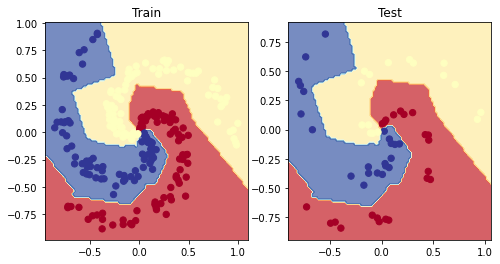

In [26]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)